In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Let's Read the data set.

file1 = pd.read_csv('./DataSets/googleplaystore.csv')

In [3]:
file1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
file1.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
## Let's check for the null values.

file1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:

from sklearn.impute import SimpleImputer
import numpy as np

In [7]:

file1['Reviews'] = file1['Reviews'].str.lower().str.replace('m', 'e6').astype(float)

In [8]:
file1['Reviews'].max()

78158306.0

In [9]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [10]:
imputer.fit(file1.iloc[:, 2:3].values)
file1.iloc[:, 2:3] = imputer.transform(file1.iloc[:, 2:3].values) # type: ignore

In [11]:
file1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [12]:
file1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [13]:
file1.dropna(inplace=True)

In [14]:
file1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Questions

## How many free apps are there ?

In [15]:
len(file1[file1['Type'] == 'Free'])

10032

In [16]:
file1.groupby('Type')['Type'].count()

Type
Free    10032
Paid      797
Name: Type, dtype: int64

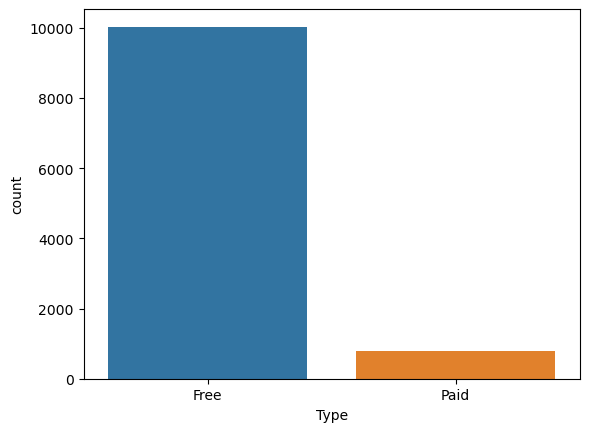

In [17]:
sns.countplot(x = 'Type', data = file1, hue = 'Type')
plt.show()

## How many free apps are there in ART_AND_DESIGN

In [18]:
len(file1[(file1['Category'] == 'ART_AND_DESIGN') & (file1['Type'] == 'Free')])

61

In [19]:
((file1['Category'] == 'ART_AND_DESIGN') & (file1['Type'] == 'Free')).sum()

61

In [20]:
file1.groupby(['Type', 'Category']).count()

App  Rating  Reviews  Size  Installs  Price  \
Type Category                                                           
Free ART_AND_DESIGN        61      61       61    61        61     61   
     AUTO_AND_VEHICLES     82      82       82    82        82     82   
     BEAUTY                53      53       53    53        53     53   
     BOOKS_AND_REFERENCE  202     202      202   202       202    202   
     BUSINESS             446     446      446   446       446    446   
...                       ...     ...      ...   ...       ...    ...   
Paid SPORTS                24      24       24    24        24     24   
     TOOLS                 77      77       77    77        77     77   
     TRAVEL_AND_LOCAL      12      12       12    12        12     12   
     VIDEO_PLAYERS          4       4        4     4         4      4   
     WEATHER                8       8        8     8         8      8   

                          Content Rating  Genres  Last Updated  Current Ver  \
Type Category                                                                 
Free ART_AND_DESIGN                   61      61            61           61   
     AUTO_AND_VEHICLES                82      82            82           82   
     BEAUTY                           53      53            53           53   
     BOOKS_AND_REFERENCE             202     202           202          202   
     BUSINESS                        446     446           446          446   
...                                  ...     ...           ...          ...   
Paid SPORTS                           24      24            24           24   
     TOOLS                            77      77            77           77   
     TRAVEL_AND_LOCAL                 12      12            12           12   
     VIDEO_PLAYERS                     4       4             4            4   
     WEATHER                           8       8             8            8   

                          Android Ver  
Type Category                          
Free ART_AND_DESIGN                61  
     AUTO_AND_VEHICLES             82  
     BEAUTY                        53  
     BOOKS_AND_REFERENCE          202  
     BUSINESS                     446  
...                               ...  
Paid SPORTS                        24  
     TOOLS                         77  
     TRAVEL_AND_LOCAL              12  
     VIDEO_PLAYERS                  4  
     WEATHER                        8  

[63 rows x 11 columns]

## How many apps are there in ART_AND_DESIGN With Rating more than 4.5?

In [21]:
len(file1[(file1['Category'] == 'ART_AND_DESIGN') & (file1['Rating'] > 4.5)])

22

## How many apps are there in Family with rating more than 4.5 and Free ?

In [22]:
len(file1[(file1['Category'] == 'FAMILY') & (file1['Rating'] > 4.5) & (file1['Type'] == 'Free')])

314

In [23]:
file1.groupby(['Type', file1['Category'] == 'FAMILY', file1['Rating'] > 4.5]).apply(len)

Type  Category  Rating
Free  False     False     6859
                True      1395
      True      False     1464
                True       314
Paid  False     False      449
                True       158
      True      False      140
                True        50
dtype: int64

## How many apps that are in Art and Design with rating more than 4.5 in ascending order with respect ratings

In [24]:
file1[(file1['Category'] == 'ART_AND_DESIGN') & (file1['Rating'] > 4.5)].sort_values(by='Rating')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,4326.0,21M,"100,000+",Free,0,Everyone,Art & Design,"June 26, 2018",1.0.4,4.4 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399.0,31M,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up
46,Install images with music to make video withou...,ART_AND_DESIGN,4.6,1070.0,26M,"100,000+",Free,0,Everyone,Art & Design,"November 14, 2017",1.6,4.1 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4764,X Launcher Prime: With OS Style Theme & No Ads,ART_AND_DESIGN,4.7,149.0,3.5M,"1,000+",Paid,$1.99,Everyone,Art & Design,"July 30, 2018",1.2.2,4.1 and up
4755,"X Launcher Pro: PhoneX Theme, OS11 Control Center",ART_AND_DESIGN,4.7,801.0,3.5M,"5,000+",Paid,$1.99,Everyone,Art & Design,"July 30, 2018",2.1.2,4.1 and up
4749,X Launcher: With OS11 Style Theme & Control Ce...,ART_AND_DESIGN,4.7,5754.0,4.4M,"100,000+",Free,0,Everyone,Art & Design,"July 30, 2018",2.1.2,4.1 and up
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531.0,24M,"10,000,000+",Free,0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up
38,PIP Camera - PIP Collage Maker,ART_AND_DESIGN,4.7,158.0,11M,"10,000+",Free,0,Everyone,Art & Design,"November 29, 2017",1.3,4.0.3 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145.0,24M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up


In [25]:
file1[(file1['Category'] == 'ART_AND_DESIGN') & (file1['Rating'] > 4.5)].sort_values(by='Rating', ascending = False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1.0,2.9M,100+,Free,0,Everyone,Art & Design,"April 18, 2018",1.0.2,4.0 and up
6930,Fantasy theme dark bw black building,ART_AND_DESIGN,4.8,41.0,1.9M,"5,000+",Free,0,Everyone,Art & Design,"March 20, 2018",1.0.2,4.0 and up
5254,AJ Styles HD Wallpapers,ART_AND_DESIGN,4.8,48.0,25M,"5,000+",Free,0,Everyone,Art & Design,"August 4, 2018",1.1.1,4.1 and up
4759,X Launcher Pro - IOS Style Theme & Control Center,ART_AND_DESIGN,4.8,1216.0,8.6M,"10,000+",Paid,$1.99,Everyone,Art & Design,"June 26, 2018",1.0.0,4.1 and up
25,Harley Quinn wallpapers HD,ART_AND_DESIGN,4.8,192.0,6.0M,"10,000+",Free,0,Everyone,Art & Design,"April 25, 2018",1.5,3.0 and up
3982,Cardi B Wallpaper,ART_AND_DESIGN,4.8,253.0,3.7M,"50,000+",Free,0,Everyone,Art & Design,"November 1, 2017",1.0.0,4.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
4764,X Launcher Prime: With OS Style Theme & No Ads,ART_AND_DESIGN,4.7,149.0,3.5M,"1,000+",Paid,$1.99,Everyone,Art & Design,"July 30, 2018",1.2.2,4.1 and up
4755,"X Launcher Pro: PhoneX Theme, OS11 Control Center",ART_AND_DESIGN,4.7,801.0,3.5M,"5,000+",Paid,$1.99,Everyone,Art & Design,"July 30, 2018",2.1.2,4.1 and up
4749,X Launcher: With OS11 Style Theme & Control Ce...,ART_AND_DESIGN,4.7,5754.0,4.4M,"100,000+",Free,0,Everyone,Art & Design,"July 30, 2018",2.1.2,4.1 and up


## How many apps that are in Art and Design with rating more than 4.5 in ascending order with respect reviews

In [26]:
file1[(file1['Category'] == 'ART_AND_DESIGN') & (file1['Rating'] > 4.5)].sort_values(by='Reviews', ascending = False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
19,ibis Paint X,ART_AND_DESIGN,4.6,224399.0,31M,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531.0,24M,"10,000,000+",Free,0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
26,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260.0,25M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145.0,24M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up
22,Superheroes Wallpapers | 4K Backgrounds,ART_AND_DESIGN,4.7,7699.0,4.2M,"500,000+",Free,0,Everyone 10+,Art & Design,"July 12, 2018",2.2.6.2,4.0.3 and up
4749,X Launcher: With OS11 Style Theme & Control Ce...,ART_AND_DESIGN,4.7,5754.0,4.4M,"100,000+",Free,0,Everyone,Art & Design,"July 30, 2018",2.1.2,4.1 and up
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,4326.0,21M,"100,000+",Free,0,Everyone,Art & Design,"June 26, 2018",1.0.4,4.4 and up
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632.0,5.5M,"500,000+",Free,0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up
4759,X Launcher Pro - IOS Style Theme & Control Center,ART_AND_DESIGN,4.8,1216.0,8.6M,"10,000+",Paid,$1.99,Everyone,Art & Design,"June 26, 2018",1.0.0,4.1 and up


## Which category is having maximum average rating.

In [49]:
# file1.groupby('Category').agg({'Rating':'mean'})
# file1.groupby('Category')[['Rating']].mean()
file1.groupby('Category')['Rating'].mean()

Category
ART_AND_DESIGN         4.368438
AUTO_AND_VEHICLES      4.190824
BEAUTY                 4.260882
BOOKS_AND_REFERENCE    4.311537
BUSINESS               4.145987
COMICS                 4.156445
COMMUNICATION          4.163842
DATING                 4.007864
EDUCATION              4.387778
ENTERTAINMENT          4.126174
EVENTS                 4.363647
FAMILY                 4.192490
FINANCE                4.139108
FOOD_AND_DRINK         4.170709
GAME                   4.282506
HEALTH_AND_FITNESS     4.266296
HOUSE_AND_HOME         4.196819
LIBRARIES_AND_DEMO     4.182938
LIFESTYLE              4.112427
MAPS_AND_NAVIGATION    4.065061
MEDICAL                4.190167
NEWS_AND_MAGAZINES     4.142993
PARENTING              4.282223
PERSONALIZATION        4.306873
PHOTOGRAPHY            4.192179
PRODUCTIVITY           4.208287
SHOPPING               4.254052
SOCIAL                 4.248001
SPORTS                 4.218404
TOOLS                  4.065970
TRAVEL_AND_LOCAL       4.119716

In [89]:
# file1[['Category', 'Type']].value_counts(sort = True, ascending = False)
file1['Category'].value_counts(ascending = False)

Category
FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [84]:
file1[file1['Type'] == 'Free'].groupby('Category')['Type'].count().sort_values(ascending=False)

Category
FAMILY                 1778
GAME                   1061
TOOLS                   764
BUSINESS                446
PRODUCTIVITY            396
LIFESTYLE               363
SPORTS                  360
COMMUNICATION           360
MEDICAL                 354
FINANCE                 349
HEALTH_AND_FITNESS      325
PHOTOGRAPHY             313
PERSONALIZATION         308
SOCIAL                  292
NEWS_AND_MAGAZINES      281
SHOPPING                258
TRAVEL_AND_LOCAL        246
DATING                  227
BOOKS_AND_REFERENCE     202
VIDEO_PLAYERS           171
EDUCATION               152
ENTERTAINMENT           147
MAPS_AND_NAVIGATION     132
FOOD_AND_DRINK          125
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       83
AUTO_AND_VEHICLES        82
WEATHER                  74
EVENTS                   63
ART_AND_DESIGN           61
COMICS                   60
PARENTING                58
BEAUTY                   53
Name: Type, dtype: int64